<a href="https://colab.research.google.com/github/m31dev/Fuel_Efficiency_Prediction/blob/main/Fuel_Efficiency_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**LOADING THE DATASET**

In [8]:
data = "/content/drive/MyDrive/data/auto-mpg.csv"
df = pd.read_csv(data)
df = df.drop(columns=["car name"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


**DATA PROCESSING AND FEATURE ENGINEERING**

In [9]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors = "coerce")
df = df.dropna(subset = ["horsepower"])
df["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [11]:
# Basic statistics
print(df.describe())


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

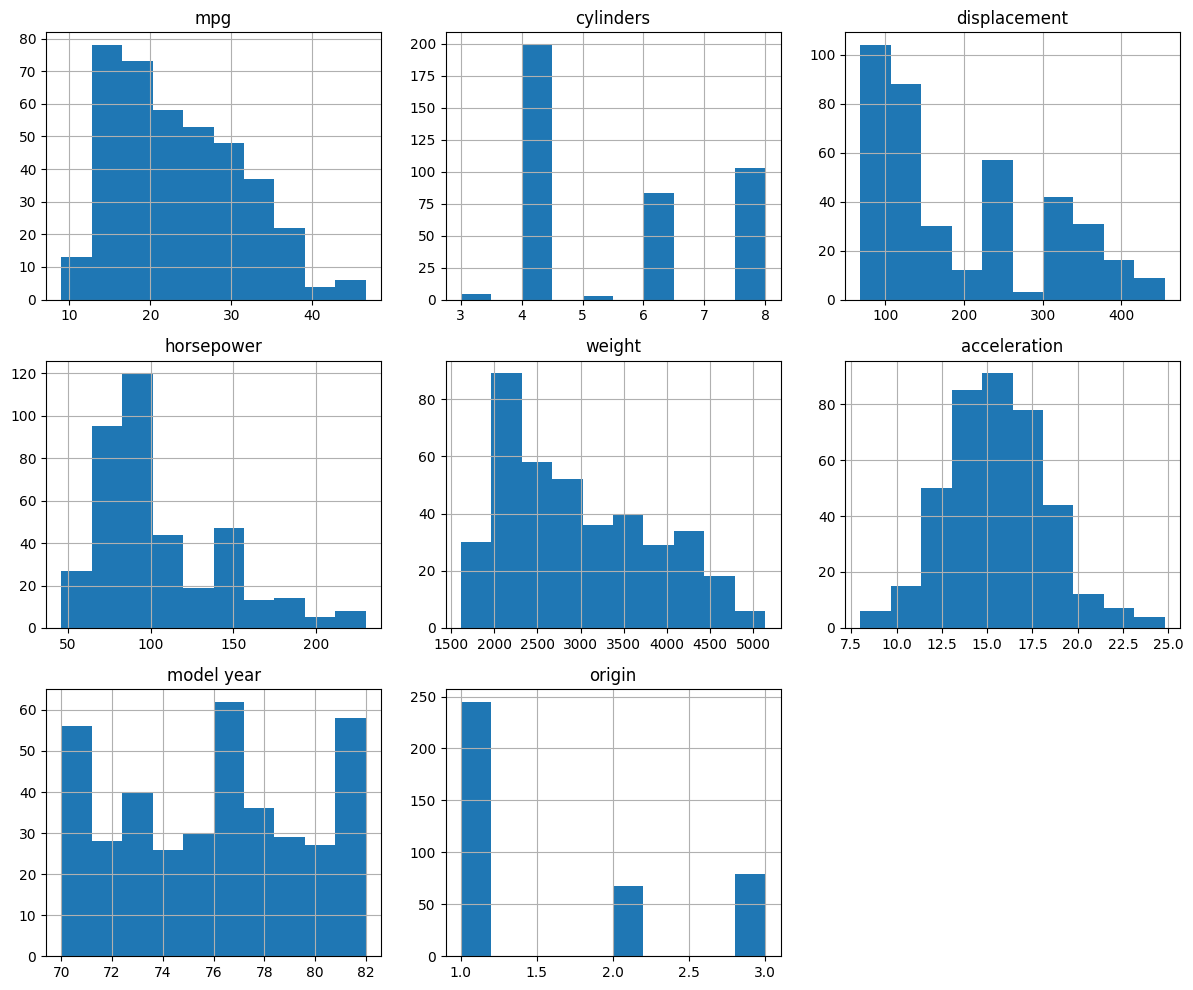

In [12]:
# Distribution plots
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

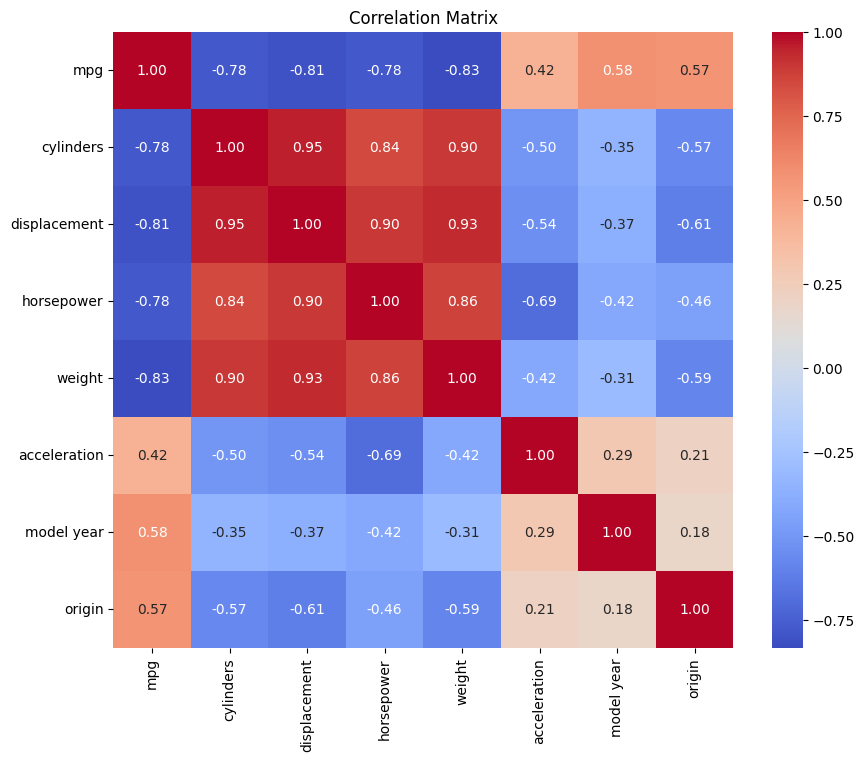

In [13]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

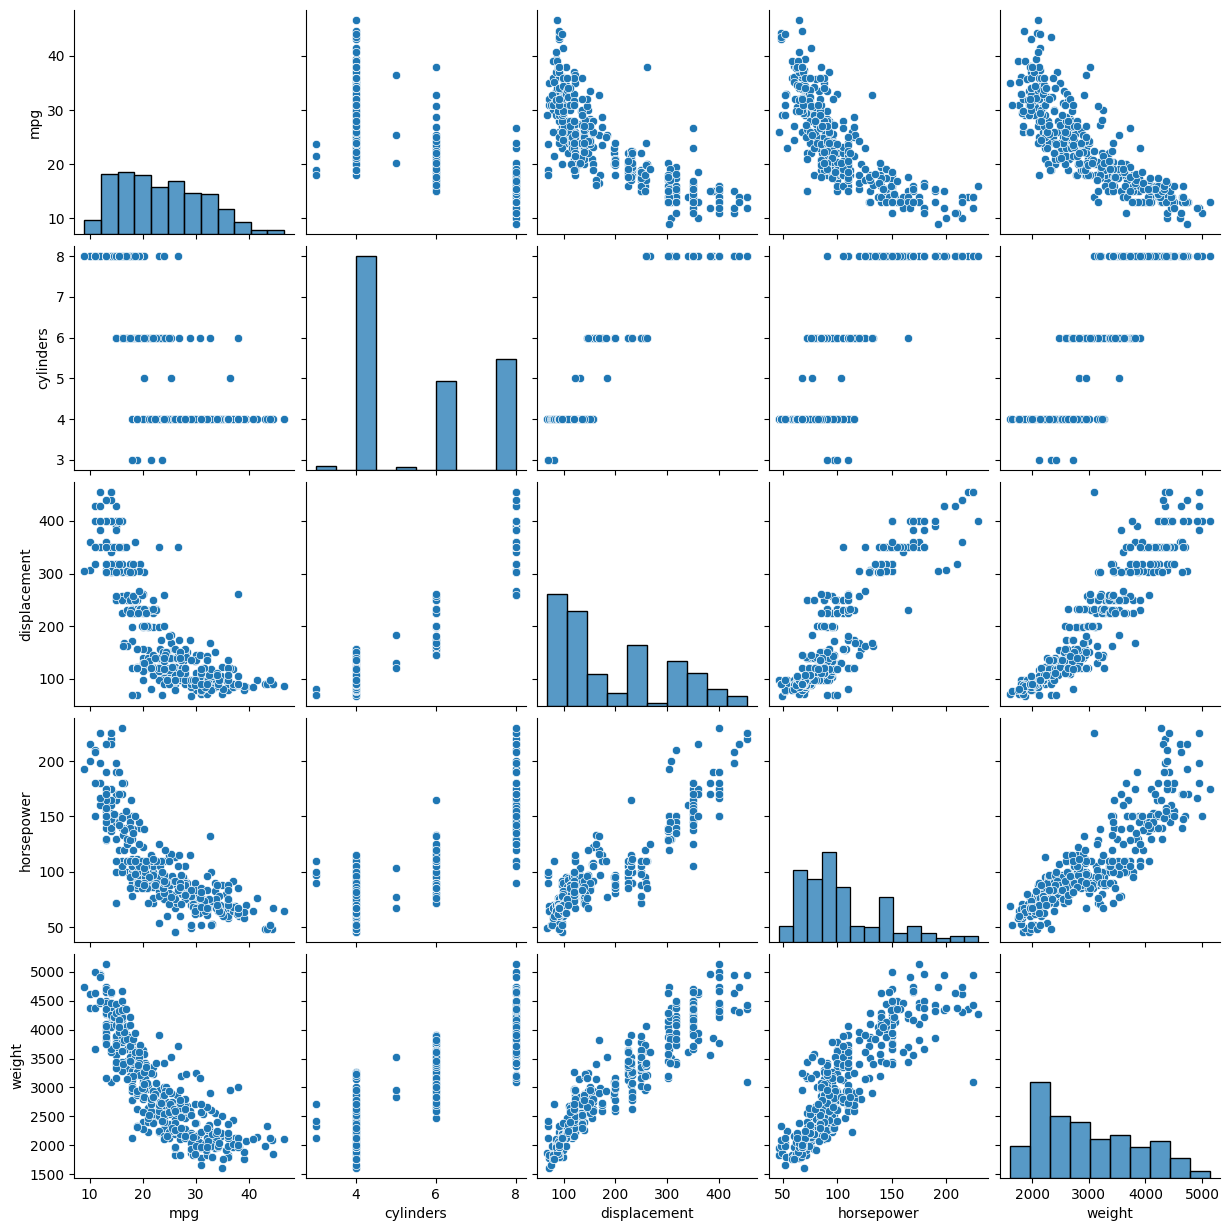

In [14]:

# Pairplot for key features
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']])
plt.show()

In [15]:
# Ensure the target variable is present and handle missing values
X = df.drop(columns=["mpg"], errors="ignore").select_dtypes(include=[float, int])

# Ensure no constant columns
X = X.loc[:, X.nunique() > 1]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values("VIF", ascending=False))


        feature         VIF
3        weight  139.454162
0     cylinders  117.708547
5    model year  115.794614
1  displacement   96.909762
4  acceleration   69.699769
2    horsepower   67.072154
6        origin    8.469942


**MODEL DEVELOPMENT AND EVALUATION**

In [17]:
X = df.drop("mpg", axis=1)
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Prediction On Training and Test Sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# RMSE For Training Set
print(f'RMSE train: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}')

# RMSE For Test Set
print(f'RMSE test: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}')

# R2 Score For Training Set
print(f'R² Score train: {r2_score(y_train, y_train_pred):.2f}')

# R2 Score For Test Set
print(f'R² Score test: {r2_score(y_test, y_test_pred):.2f}')


RMSE train: 3.31
RMSE test: 3.27
R² Score train: 0.83
R² Score test: 0.79


**POST PROCESSING AND CLASSIFICATION**

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        43
           1       0.76      0.97      0.85        36

    accuracy                           0.85        79
   macro avg       0.87      0.86      0.85        79
weighted avg       0.87      0.85      0.85        79



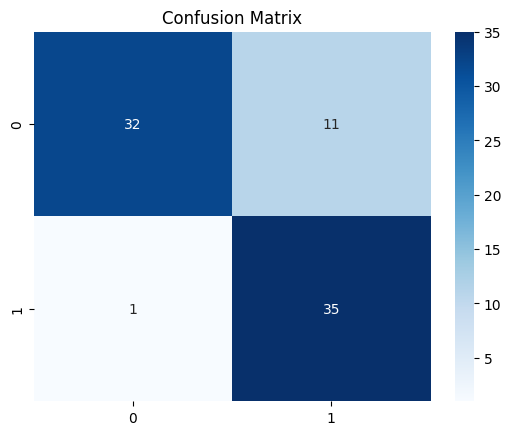

In [19]:
# Classification & Visualization
threshold = y_train.median()

# Convert to classes
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_test_pred > threshold).astype(int)

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



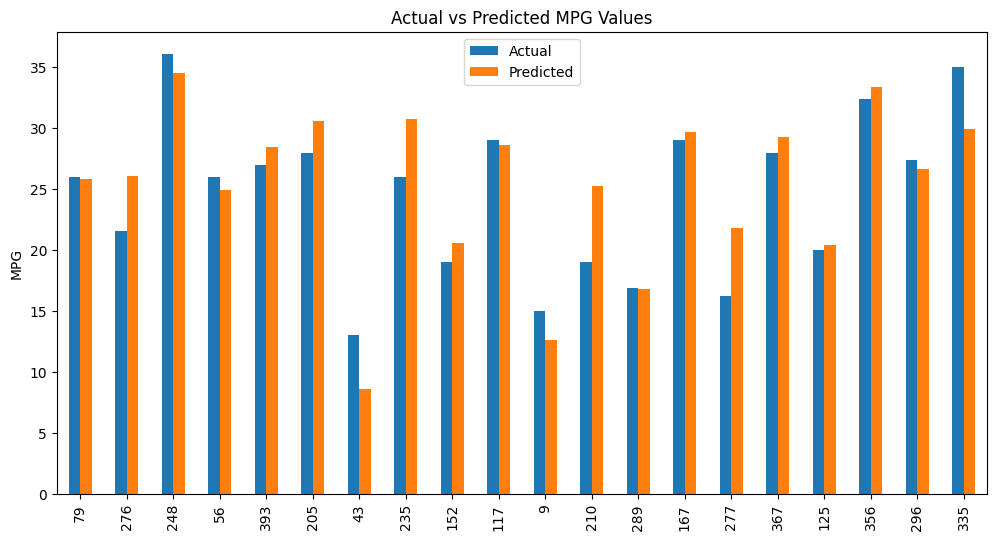

In [ ]:
# Actual vs Predicted Plot
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.head(20).plot(kind='bar', figsize=(12,6))
plt.title('Actual vs Predicted MPG Values')
plt.ylabel('MPG')
plt.show()